This code is used to create the strategized k fold split for the Training process.

Housekeeping

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=c7b47bb8b1f2419254da328e2185d253f8edf10e9be21fe83ede4022ce71e267
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


First we download the entire available training data

In [2]:
import wget
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold


In [3]:
wget.download('https://raw.githubusercontent.com/iabufarha/iSarcasmEval/main/train/train.En.csv')

'train.En.csv'

Create a mapping for the labels

In [4]:
raw_df_train = pd.read_csv('train.En.csv')
print(len(raw_df_train))

def map_sarcasm_to_intent(sarcasm):
    return "sarcastic" if sarcasm == 1 else "not sarcastic"

raw_df_train['intent'] = raw_df_train['sarcastic'].apply(map_sarcasm_to_intent)

raw_df_train.rename(columns={'tweet': 'utterance'}, inplace=True)

raw_df_train = raw_df_train[["intent", "utterance"]]

raw_df_train = shuffle(raw_df_train)


raw_df_train.to_csv('train.csv', index=False)

print(f"Train data length: {len(raw_df_train)}")


3468
Train data length: 3468


Following code was advised by ChatGPT

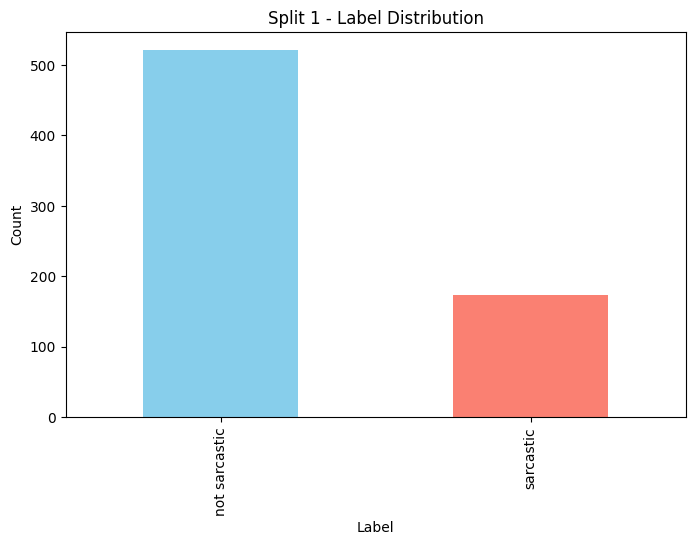

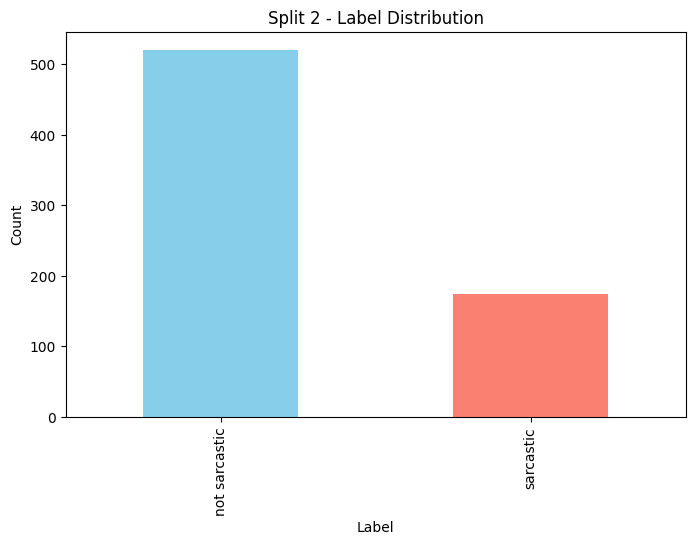

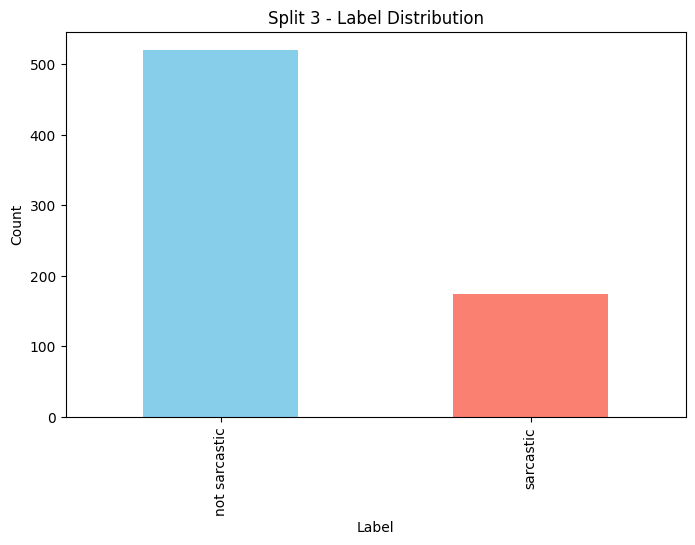

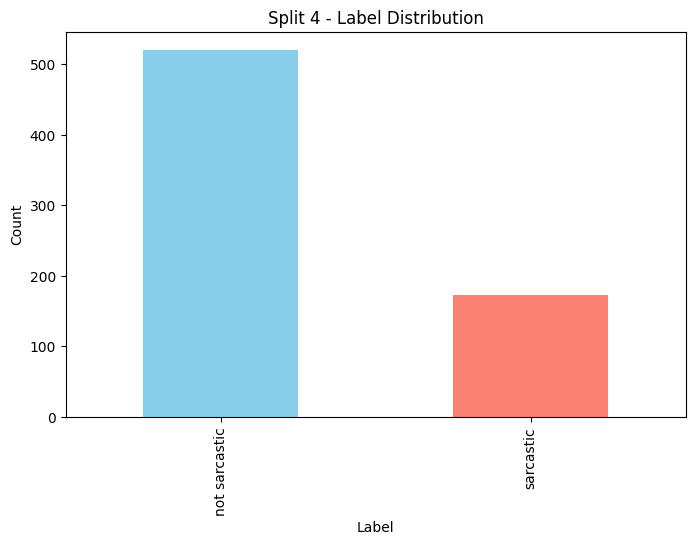

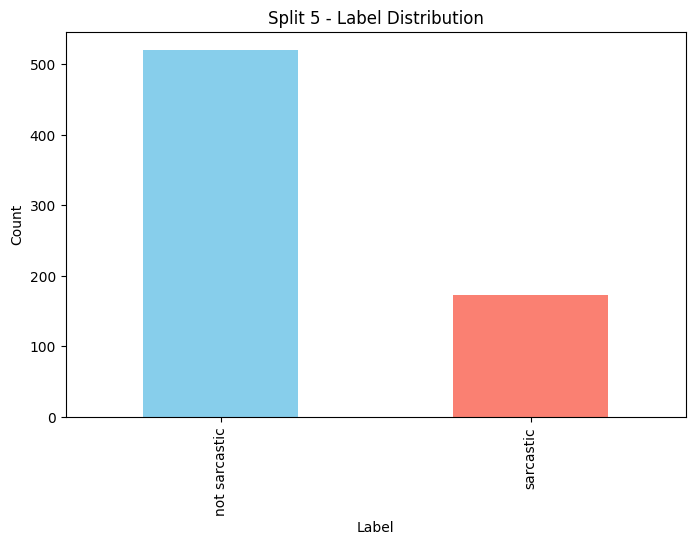

In [5]:
# Extract text and label columns
X = raw_df_train['utterance'].values
y = raw_df_train['intent'].values

# Set the number of folds (k)
k = 5

# Initialize the stratified k-fold splitter
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Create a directory to save the split files
import os
os.makedirs('stratified_kfold_splits', exist_ok=True)

# Iterate over the splits and save them
for fold, (train_idx, test_idx) in enumerate(stratified_kfold.split(X, y)):
    # Create a DataFrame for the current split with text and label columns
    split_data = pd.DataFrame({
        'utterance': X[test_idx],
        'intent': y[test_idx]
    })
    split_data.to_csv(f'stratified_kfold_splits/split_{fold+1}.csv', index=False)
    plt.figure(figsize=(8, 5))
    plt.title(f'Split {fold+1} - Label Distribution')
    split_data['intent'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

Confirm lengths

In [6]:
def print_file_lengths(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path)
            print(f"Length of {filename}: {len(df)}")

In [7]:
print_file_lengths("stratified_kfold_splits")

Length of split_3.csv: 694
Length of split_2.csv: 694
Length of split_5.csv: 693
Length of split_4.csv: 693
Length of split_1.csv: 694


In [8]:
import shutil
folder_name = "stratified_kfold_splits"
shutil.make_archive(folder_name, 'zip', folder_name)

'/content/stratified_kfold_splits.zip'